# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

Дополнения: *Татьяна Рогович, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2019/11/01/6d81af446082fc96193e263203da6ada.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:url"/>
<meta conten

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2019/11/01/6d81af446082fc96193e263203da6ada.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="apple-touch-icon.png" rel="apple-touch-icon"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta content="https://npl

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта.

Сначала посмотрим, что возвращается по поиску всех ссылок.

In [8]:
for link in soup.find_all('a'):
    print(link)

<a class="action-menu pull-left" href="#"><i class="icon icon-navicon"></i></a>
<a class="link-logo" href="/"><img src="/i/logo-mobile.png"/></a>
<a class="action-search pull-right" href="#"><i class="icon icon-search"></i></a>
<a class="action-search-close" href="#">×</a>
<a class="" href="/rubric/astronomy">Астрономия</a>
<a class="" href="/rubric/physics">Физика</a>
<a class="" href="/rubric/biology">Биология</a>
<a class="" href="/rubric/robots-drones">Роботы и дроны</a>
<a class="" href="/theme/nobelprize">Нобелевская премия</a>
<a class="" href="/theme/oops">Научные закрытия</a>
<a class="" href="/theme/hayabusa">Приключения «Хаябусы-2»</a>
<a class="" href="/theme/art-of-integration">Интегрирование — искусство</a>
<a class="link-logo" href="/"></a>
<a class="action-search-close" href="#">×</a>
<a class="" href="/rubric/astronomy">Астрономия</a>
<a class="" href="/rubric/physics">Физика</a>
<a class="" href="/rubric/biology">Биология</a>
<a class="" href="/rubric/robots-drones">Р

Здесь гораздо больше, чем нам нужно. Оставим только те, у которых есть атрибут 'href'

In [9]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/nobelprize
/theme/oops
/theme/hayabusa
/theme/art-of-integration
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/nobelprize
/theme/oops
/theme/hayabusa
/theme/art-of-integration
https://nplus1.ru/blog/2019/11/01/access-denied
https://nplus1.ru/blog/2019/11/01/access-denied
https://nplus1.ru/blog/2019/11/01/the-eye-of-faith
https://nplus1.ru/blog/2019/10/30/losing-the-nobel-prize
https://nplus1.ru/blog/2019/10/30/a-good-plan
https://nplus1.ru/blog/2019/10/28/no-fear-with-vr
https://nplus1.ru/blog/2019/10/28/trillion-dollars-damage
https://nplus1.ru/blog/2019/10/25/quantum-supremacy
https://nplus1.ru/blog/2019/10/24/henry-the-fifth-part-one
https://nplus1.ru/blog/2019/10/24/infosecurity-in-the-cloud
https://nplus1.ru/blog/2019/11/05/13-thousand-bucks
/news/2019/11/06/cell-sensor
/news/2019/11/06/laser-voice-assistant
/news/2019/11/06/elephant
/news/2019/11/06/turkis

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [10]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2019/11/06/cell-sensor',
 '/news/2019/11/06/laser-voice-assistant',
 '/news/2019/11/06/elephant',
 '/news/2019/11/06/turkish-alisa',
 '/news/2019/11/06/identification',
 '/news/2019/11/06/Voyager2-interstellar',
 '/news/2019/11/06/hypercapnic-mice',
 '/news/2019/11/06/antilaser',
 '/news/2019/11/05/sleeping-beauty-editing',
 '/news/2019/11/05/black-hole-nurture',
 '/news/2019/11/05/nrem-v-anxiety',
 '/news/2019/11/05/nextGen',
 '/news/2019/11/05/robobee',
 '/news/2019/11/05/submarine',
 '/news/2019/11/05/gene-therapy-cocktail',
 '/news/2019/11/05/smokeScreen',
 '/news/2019/11/04/artificial-phototropism',
 '/news/2019/11/04/Mutation-combo',
 '/news/2019/11/04/pad-abort-test',
 '/news/2019/11/02/cycloadditions-photocatalysed-by-QDs',
 '/news/2019/10/30/meta-waves',
 '/news/2019/10/30/quantum-battery',
 '/news/2019/11/01/CMB-lensing',
 '/news/2019/10/30/random-fluctuations',
 '/news/2019/11/06/cell-sensor',
 '/news/2019/11/04/artificial-phototropism',
 '/news/2019/11/05/black-hole

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [11]:
full_urls = ['https://nplus1.ru' + url for url in urls]
full_urls

['https://nplus1.ru/news/2019/11/06/cell-sensor',
 'https://nplus1.ru/news/2019/11/06/laser-voice-assistant',
 'https://nplus1.ru/news/2019/11/06/elephant',
 'https://nplus1.ru/news/2019/11/06/turkish-alisa',
 'https://nplus1.ru/news/2019/11/06/identification',
 'https://nplus1.ru/news/2019/11/06/Voyager2-interstellar',
 'https://nplus1.ru/news/2019/11/06/hypercapnic-mice',
 'https://nplus1.ru/news/2019/11/06/antilaser',
 'https://nplus1.ru/news/2019/11/05/sleeping-beauty-editing',
 'https://nplus1.ru/news/2019/11/05/black-hole-nurture',
 'https://nplus1.ru/news/2019/11/05/nrem-v-anxiety',
 'https://nplus1.ru/news/2019/11/05/nextGen',
 'https://nplus1.ru/news/2019/11/05/robobee',
 'https://nplus1.ru/news/2019/11/05/submarine',
 'https://nplus1.ru/news/2019/11/05/gene-therapy-cocktail',
 'https://nplus1.ru/news/2019/11/05/smokeScreen',
 'https://nplus1.ru/news/2019/11/04/artificial-phototropism',
 'https://nplus1.ru/news/2019/11/04/Mutation-combo',
 'https://nplus1.ru/news/2019/11/04/pa

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [12]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

In [13]:
soup0

<!DOCTYPE html>
<html class="no-js bg-fixed _no-bg" lang="" style="background-image:url(https://nplus1.ru/images/2019/11/06/81c7b8dd5d11dc788091a01e9608ff5d.gif)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://nplus1.ru/news/2019/11/06/laser-voice-assistant" rel="canonical"/>
<title>Лазерный луч нашептал команды умной колонке за окном</title>
<meta content="2019-11-06" itemprop="datePublished"/>
<meta content="Григорий Копиев" name="mediator_author"/>
<!-- amp page -->
<link href="https://nplus1.ru/news/2019/11/06/laser-voice-assistant/amp" rel="amphtml"/>
<!-- for Google -->
<meta content="Это можно использовать для управления умным домом на расстоянии и даже через стекло" n

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [14]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2019-11-06" itemprop="datePublished"/>,
 <meta content="Григорий Копиев" name="mediator_author"/>,
 <meta content="Это можно использовать для управления умным домом на расстоянии и даже через стекло" name="description"/>,
 <meta content="Григорий Копиев" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Лазерный луч нашептал команды умной колонке за окном" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2019/11/06/84d5fbf05c734e7bf175ff498242d94d.gif" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2019/11/06/laser-voice-assistant" property="og:url"/>,
 <meta content="Это можно использовать для управления умным домом на расстоянии и даже ч

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [15]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Григорий Копиев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [16]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Григорий Копиев" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [17]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Григорий Копиев'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [18]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Григорий Копиев'

Аналогичным образом извлечем дату, заголовок и описание.

In [19]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

In [20]:
print(date)
print(title)
print(description)

2019-11-06
Лазерный луч нашептал команды умной колонке за окном
Это можно использовать для управления умным домом на расстоянии и даже через стекло


Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [21]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="it" href="/rubric/it">IT</a>
 </p>, <p class="table">
 <a href="/news/2019/11/06">
 <time content="2019-11-06" data-unix="1573037656" itemprop="datePublished">
 <span>13:54</span>
 <span>06 Нояб. 2019</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/3.2">
 <span>Сложность</span>
 <span class="difficult-value">3.2</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">Light Commands</p>, <p>Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и <a href="https://lightcommands.com/20191104-Light-Commands.pdf" rel="nofollow" target="_blank">статья</a> о нем опубликован

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [22]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="it" href="/rubric/it">IT</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [23]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['IT']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [24]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">3.2</span>]

И выберем оттуда текст.

In [25]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'3.2'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [26]:
text_list = soup0.find_all('p', {'class' : None})

In [27]:
text_list

[<p>Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и <a href="https://lightcommands.com/20191104-Light-Commands.pdf" rel="nofollow" target="_blank">статья</a> о нем опубликованы на <a href="https://lightcommands.com/" rel="nofollow" target="_blank">сайте</a> авторов.<br/></p>,
 <p>Изначально голосовые помощники, такие как Siri и Google Now, использовались в основном для зачитывания фактов из Википедии или прогноза погода. Впоследствии разработчики превратили их в гораздо более мощный инструмент, позволяющий взаимодействовать со сторонними приложениями и устройствами умного дома, к примеру, даже умными замками. А Google 

«Выцепим» все тексты (без тэгов) из полученного списка:

In [28]:
for t in text_list:
    print(t)
    break

<p>Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и <a href="https://lightcommands.com/20191104-Light-Commands.pdf" rel="nofollow" target="_blank">статья</a> о нем опубликованы на <a href="https://lightcommands.com/" rel="nofollow" target="_blank">сайте</a> авторов.<br/></p>


In [29]:
for t in text_list:
    print(t.text)
    break

Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и статья о нем опубликованы на сайте авторов.


In [30]:
text = [t.text for t in text_list]
text

['Американские и\xa0японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с\xa0микроэлектромеханическими микрофонами. Например, они показали это на\xa0примере голосового управления Tesla и\xa0iPhone. Методика основана на\xa0возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на\xa0большом расстоянии. Описание метода и\xa0статья о\xa0нем опубликованы на\xa0сайте авторов.',
 'Изначально голосовые помощники, такие как Siri и\xa0Google Now, использовались в\xa0основном для зачитывания фактов из\xa0Википедии или прогноза погода. Впоследствии разработчики превратили их\xa0в\xa0гораздо более мощный инструмент, позволяющий взаимодействовать со\xa0сторонними приложениями и\xa0устройствами умного дома, к\xa0примеру, даже умными замками. А\xa0Google Assistant даже умеет самостоятельно записывать пользователя на\xa0прием или отвечать на\xa0звонки. Все эти возможности повышают у

Склеим все элементы списка `text` через пробел:

In [31]:
final_text = ' '.join(text)
final_text

'Американские и\xa0японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с\xa0микроэлектромеханическими микрофонами. Например, они показали это на\xa0примере голосового управления Tesla и\xa0iPhone. Методика основана на\xa0возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на\xa0большом расстоянии. Описание метода и\xa0статья о\xa0нем опубликованы на\xa0сайте авторов. Изначально голосовые помощники, такие как Siri и\xa0Google Now, использовались в\xa0основном для зачитывания фактов из\xa0Википедии или прогноза погода. Впоследствии разработчики превратили их\xa0в\xa0гораздо более мощный инструмент, позволяющий взаимодействовать со\xa0сторонними приложениями и\xa0устройствами умного дома, к\xa0примеру, даже умными замками. А\xa0Google Assistant даже умеет самостоятельно записывать пользователя на\xa0прием или отвечать на\xa0звонки. Все эти возможности повышают удобст

Все здорово, только мешают артефакты форматирования из html. Заменим их на пробелы с помощью метода `.sub` библиотеки regular expression:

In [32]:
import re
final_text = re.sub(r'[^\w\ \S]', ' ', final_text)
final_text

'Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и статья о нем опубликованы на сайте авторов. Изначально голосовые помощники, такие как Siri и Google Now, использовались в основном для зачитывания фактов из Википедии или прогноза погода. Впоследствии разработчики превратили их в гораздо более мощный инструмент, позволяющий взаимодействовать со сторонними приложениями и устройствами умного дома, к примеру, даже умными замками. А Google Assistant даже умеет самостоятельно записывать пользователя на прием или отвечать на звонки. Все эти возможности повышают удобство использования голосовых помощников, но вместе с этим дела

И последняя проблема - в на текст проникла еще метадата (посмотрите в конец файла). Но мы видим, что в тектсе есть подпись автора и мы можем отрезать все, что ниже нее включительно.

In [33]:
final_text[:final_text.find(author)-1] # захватим еще пробел с помощью -1

'Американские и японские инженеры показали, что лазерный луч можно использовать для передачи голосовых команд умным колонкам и другим устройствам с микроэлектромеханическими микрофонами. Например, они показали это на примере голосового управления Tesla и iPhone. Методика основана на возбуждении колебаний диафрагмы микрофона мощным лазерным лучом, что позволяет передавать команды на большом расстоянии. Описание метода и статья о нем опубликованы на сайте авторов. Изначально голосовые помощники, такие как Siri и Google Now, использовались в основном для зачитывания фактов из Википедии или прогноза погода. Впоследствии разработчики превратили их в гораздо более мощный инструмент, позволяющий взаимодействовать со сторонними приложениями и устройствами умного дома, к примеру, даже умными замками. А Google Assistant даже умеет самостоятельно записывать пользователя на прием или отвечать на звонки. Все эти возможности повышают удобство использования голосовых помощников, но вместе с этим дела

In [34]:
final_text = final_text[:final_text.find(author)-1]

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [35]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = re.sub(r'[^\w\ \S]', ' ', final_text)
    final_text = final_text[:final_text.find(author)-1]
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [36]:
from time import sleep

In [37]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [38]:
news[0]

('https://nplus1.ru/news/2019/11/06/cell-sensor',
 '2019-11-06',
 'Дмитрий Трунин',
 'До сих пор ученые рассматривали только статичные растворы',
 'Физики оценили чувствительность клеток к быстрым и слабым колебаниям концентрации раздражителей',
 'Физики из Франции и США построили теоретическую модель, которая оценивает погрешность, с которой клетка оценивает концентрацию молекул-раздражителей в переменной окружающей среде. В этой модели клетки гораздо более чувствительны к слабым колебаниям концентрации раздражителя в сильно разведенном растворе, чем в модели с фиксированной концентрацией (что согласуется с наблюдениями биологов). Статья опубликована в Physical Review Letters, кратко о ней сообщает Physics, препринт работы выложен на сайте arXiv.org. Чтобы выжить в переменчивой среде, одноклеточные организмы научились реагировать на внешние раздражители. Например, инфузория туфелька чувствует, что заплыла в область с повышенной концентрацией соли, и пытается сбежать в менее соленые кр

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [39]:
import pandas as pd

In [40]:
df = pd.DataFrame(news)

In [41]:
df.shape

(28, 8)

In [42]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/11/06/cell-sensor,2019-11-06,Дмитрий Трунин,До сих пор ученые рассматривали только статичн...,Физики оценили чувствительность клеток к быстр...,Физики из Франции и США построили теоретическу...,"[Физика, Биология]",5.6
1,https://nplus1.ru/news/2019/11/06/laser-voice-...,2019-11-06,Григорий Копиев,Это можно использовать для управления умным до...,Лазерный луч нашептал команды умной колонке за...,"Американские и японские инженеры показали, что...",[IT],3.2


Переименуем столбцы в базе.

In [43]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [44]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/11/06/cell-sensor,2019-11-06,Дмитрий Трунин,До сих пор ученые рассматривали только статичн...,Физики оценили чувствительность клеток к быстр...,Физики из Франции и США построили теоретическу...,"[Физика, Биология]",5.6
1,https://nplus1.ru/news/2019/11/06/laser-voice-...,2019-11-06,Григорий Копиев,Это можно использовать для управления умным до...,Лазерный луч нашептал команды умной колонке за...,"Американские и японские инженеры показали, что...",[IT],3.2


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [45]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [46]:
df.diffc.describe()

count    28.000000
mean      3.928571
std       1.590215
min       1.100000
25%       3.100000
50%       3.650000
75%       5.225000
max       6.700000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

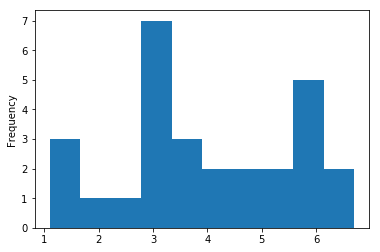

In [47]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [48]:
df['rubric'] = ['|'.join(r) for r in df.rubric]

In [49]:
df.head()

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/11/06/cell-sensor,2019-11-06,Дмитрий Трунин,До сих пор ученые рассматривали только статичн...,Физики оценили чувствительность клеток к быстр...,Физики из Франции и США построили теоретическу...,Физика|Биология,5.6
1,https://nplus1.ru/news/2019/11/06/laser-voice-...,2019-11-06,Григорий Копиев,Это можно использовать для управления умным до...,Лазерный луч нашептал команды умной колонке за...,"Американские и японские инженеры показали, что...",IT,3.2
2,https://nplus1.ru/news/2019/11/06/elephant,2019-11-06,Василий Сычев,В ближайшее время начнутся продувочные испытан...,В Подмосковье собрали аэродинамическую модель ...,Специалисты подмосковного Центрального аэрогид...,Авиация,3.1
3,https://nplus1.ru/news/2019/11/06/turkish-alisa,2019-11-06,Елизавета Ивтушок,Это первый иностранный язык голосового помощни...,Алиса заговорила по-турецки,Компания «Яндекс» подключила к Яндекс.Навигато...,IT,1.1
4,https://nplus1.ru/news/2019/11/06/identification,2019-11-06,Екатерина Русакова,Опознать генерала позволил анализ генома и его...,Генетики подтвердили личность погибшего в 1812...,Найденные летом в Смоленской области останки ...,Археология|Генетика,1.5


Если бы мы планировали использовать текст для предсказательных моделей, нам был для начала пришлось его стандартировать (привести к нижнему регистру, очистить от знаков препинания и стоп-слов). Давайте попробуем это сделать.

In [50]:
df['text_clean'] = df['text']

In [51]:
stop_words = ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между']

Как обычно поэксперементируем на первой новости.

In [52]:
df.iloc[0]['text_clean']

'Физики из Франции и США построили теоретическую модель, которая оценивает погрешность, с которой клетка оценивает концентрацию молекул-раздражителей в переменной окружающей среде. В этой модели клетки гораздо более чувствительны к слабым колебаниям концентрации раздражителя в сильно разведенном растворе, чем в модели с фиксированной концентрацией (что согласуется с наблюдениями биологов). Статья опубликована в Physical Review Letters, кратко о ней сообщает Physics, препринт работы выложен на сайте arXiv.org. Чтобы выжить в переменчивой среде, одноклеточные организмы научились реагировать на внешние раздражители. Например, инфузория туфелька чувствует, что заплыла в область с повышенной концентрацией соли, и пытается сбежать в менее соленые края. Очевидно, что клетка распознает примеси химических соединений с помощью рецепторов, расположенных на ее поверхности. Тем не менее, ученые до сих пор плохо понимают, как именно молекулы веществ связываются с рецепторами. Долгое время исследоват

In [53]:
text_clean = ' '.join([word for word in df.iloc[0]['text_clean'].split() if not word in stop_words])
text_clean

'Физики Франции США построили теоретическую модель, которая оценивает погрешность, которой клетка оценивает концентрацию молекул-раздражителей переменной окружающей среде. В модели клетки гораздо чувствительны слабым колебаниям концентрации раздражителя сильно разведенном растворе, модели фиксированной концентрацией (что согласуется наблюдениями биологов). Статья опубликована Physical Review Letters, кратко сообщает Physics, препринт работы выложен сайте arXiv.org. Чтобы выжить переменчивой среде, одноклеточные организмы научились реагировать внешние раздражители. Например, инфузория туфелька чувствует, заплыла область повышенной концентрацией соли, пытается сбежать менее соленые края. Очевидно, клетка распознает примеси химических соединений помощью рецепторов, расположенных поверхности. Тем менее, ученые сих пор плохо понимают, именно молекулы веществ связываются рецепторами. Долгое время исследователи считали, отклик рецептора зависит средней концентрации вещества-раздражителя, одна

In [54]:
text_clean = text_clean.lower()
text_clean

'физики франции сша построили теоретическую модель, которая оценивает погрешность, которой клетка оценивает концентрацию молекул-раздражителей переменной окружающей среде. в модели клетки гораздо чувствительны слабым колебаниям концентрации раздражителя сильно разведенном растворе, модели фиксированной концентрацией (что согласуется наблюдениями биологов). статья опубликована physical review letters, кратко сообщает physics, препринт работы выложен сайте arxiv.org. чтобы выжить переменчивой среде, одноклеточные организмы научились реагировать внешние раздражители. например, инфузория туфелька чувствует, заплыла область повышенной концентрацией соли, пытается сбежать менее соленые края. очевидно, клетка распознает примеси химических соединений помощью рецепторов, расположенных поверхности. тем менее, ученые сих пор плохо понимают, именно молекулы веществ связываются рецепторами. долгое время исследователи считали, отклик рецептора зависит средней концентрации вещества-раздражителя, одна

А теперь давайте очистим текст от всего, что не русские буквы.

In [55]:
' '.join(re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)*', text_clean))

'физики франции сша построили теоретическую модель которая оценивает погрешность которой клетка оценивает концентрацию молекул-раздражителей переменной окружающей среде в модели клетки гораздо чувствительны слабым колебаниям концентрации раздражителя сильно разведенном растворе модели фиксированной концентрацией что согласуется наблюдениями биологов статья опубликована кратко сообщает препринт работы выложен сайте чтобы выжить переменчивой среде одноклеточные организмы научились реагировать внешние раздражители например инфузория туфелька чувствует заплыла область повышенной концентрацией соли пытается сбежать менее соленые края очевидно клетка распознает примеси химических соединений помощью рецепторов расположенных поверхности тем менее ученые сих пор плохо понимают именно молекулы веществ связываются рецепторами долгое время исследователи считали отклик рецептора зависит средней концентрации вещества-раздражителя однако недавно биологи выяснили действительности клетки также чувствую

Если бы у нас стояла задача, оставить английские слова и любые знаки и числа, которые являются частью слов, то можно написать более страшный регекс.

In [56]:
import re

In [57]:
re.sub(r'([\d]+-[\d]+)|(\b\d+)|([^\s\w\d]+)\s|([,])|\s([^\s\w\d]+)', ' ', text_clean)

'физики франции сша построили теоретическую модель которая оценивает погрешность которой клетка оценивает концентрацию молекул-раздражителей переменной окружающей среде в модели клетки гораздо чувствительны слабым колебаниям концентрации раздражителя сильно разведенном растворе модели фиксированной концентрацией что согласуется наблюдениями биологов статья опубликована physical review letters кратко сообщает physics препринт работы выложен сайте arxiv.org чтобы выжить переменчивой среде одноклеточные организмы научились реагировать внешние раздражители например инфузория туфелька чувствует заплыла область повышенной концентрацией соли пытается сбежать менее соленые края очевидно клетка распознает примеси химических соединений помощью рецепторов расположенных поверхности тем менее ученые сих пор плохо понимают именно молекулы веществ связываются рецепторами долгое время исследователи считали отклик рецептора зависит средней концентрации вещества-раздражителя однако недавно биологи выясн

Объясняем более страшный регекс:

В отличие от первого способа, тут мы будем делать сразу замену всего что попадает в наш регекс на пробел. Наченм с чисел вида 30-60. Для них применим следующей регекс: [\d]+-[\d]+, что означает найди все последовательности из чисел (минимум одна цифра) за которой идет дефис и другая последовательность чисел, длинной минимум 1. 6-90 попадет, а вот -20 из "слово-20" уже нет. Далее мы говорим что это один из варинатов регекса |, что по факут означает ИЛИ. Дальше мы отсекаем любые числа. Мы считаем исходя из текстов, что к этому относятся любые стоящие отдельно числа, т.е. пример 5, вырежет 5, а вот cas9 оставит. Потому что в данном случае число входит в само слово (мы считаем что все тексты вычитаны и опечаток в них нет). Тут простой регекс \b\d+, т.е. начало слова и последовательность чисел. Снова пишем | и теперь уже ищем любые спец символы, идущие после слова: точки, запятые, скобки, вопросы, кавчки и.т.д. Они все перечислены в [], а для того чтобы указать, что нам нужны именно стоящие после слова знаки, ищем после них один символ пробела \s (опять же считаем, что все тексты отредактированы и после знаков стоят пробелы). Теперь мы убрали почти все спец символы, остались только открывающие кавычки и скобки. Уберем их аналогичным выражением, только находя сначала пробел,, а потом уже спецсимволы.

Теперь складываем все это в функцию.

In [58]:
# В Питоне поиск в множествах (set) быстрее чем поиск в

stops = set(stop_words) 

def text_to_words(raw_text):
    global stops
    
    # приводим к нижнему регистру
    text_lower = raw_text.lower()
    
    # Оставляем только русские буквы и дефисы внутри слов
    text_clean = re.findall(r'[а-яА-Я]+(?:-[а-яА-Я]+)*', text_lower)
           
    # Убираем стоп-слова
    meaningful_words = ' '.join([word for word in text_clean if not word in stops])

    # Объединяем все слова вместе в одну строчку, разделяя слова пробелом, 
    # и возвращаем результат
    return meaningful_words

In [59]:
for idx in range(len(df)):
    df['text_clean'][idx] = text_to_words(df['text_clean'][idx])
    print(df.loc[idx]['text_clean'])
    break

физики франции сша построили теоретическую модель которая оценивает погрешность которой клетка оценивает концентрацию молекул-раздражителей переменной окружающей среде модели клетки гораздо чувствительны слабым колебаниям концентрации раздражителя сильно разведенном растворе модели фиксированной концентрацией согласуется наблюдениями биологов статья опубликована кратко сообщает препринт работы выложен сайте выжить переменчивой среде одноклеточные организмы научились реагировать внешние раздражители например инфузория туфелька чувствует заплыла область повышенной концентрацией соли пытается сбежать менее соленые края очевидно клетка распознает примеси химических соединений помощью рецепторов расположенных поверхности менее ученые сих пор плохо понимают именно молекулы веществ связываются рецепторами долгое время исследователи считали отклик рецептора зависит средней концентрации вещества-раздражителя однако недавно биологи выяснили действительности клетки также чувствуют быстрые изменен

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Все работает, запускаем на всем датасете.

In [60]:
for idx in range(len(df)):
    df['text_clean'][idx] = text_to_words(df['text_clean'][idx])

C:\Users\rogov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
df.head()

,link,date,author,desc,title,text,rubric,diffc,text_clean
0,https://nplus1.ru/news/2019/11/06/cell-sensor,2019-11-06,Дмитрий Трунин,До сих пор ученые рассматривали только статичн...,Физики оценили чувствительность клеток к быстр...,Физики из Франции и США построили теоретическу...,Физика|Биология,5.6,физики франции сша построили теоретическую мод...
1,https://nplus1.ru/news/2019/11/06/laser-voice-...,2019-11-06,Григорий Копиев,Это можно использовать для управления умным до...,Лазерный луч нашептал команды умной колонке за...,"Американские и японские инженеры показали, что...",IT,3.2,американские японские инженеры показали лазерн...
2,https://nplus1.ru/news/2019/11/06/elephant,2019-11-06,Василий Сычев,В ближайшее время начнутся продувочные испытан...,В Подмосковье собрали аэродинамическую модель ...,Специалисты подмосковного Центрального аэрогид...,Авиация,3.1,специалисты подмосковного центрального аэрогид...
3,https://nplus1.ru/news/2019/11/06/turkish-alisa,2019-11-06,Елизавета Ивтушок,Это первый иностранный язык голосового помощни...,Алиса заговорила по-турецки,Компания «Яндекс» подключила к Яндекс.Навигато...,IT,1.1,компания яндекс подключила яндекс навигатору т...
4,https://nplus1.ru/news/2019/11/06/identification,2019-11-06,Екатерина Русакова,Опознать генерала позволил анализ генома и его...,Генетики подтвердили личность погибшего в 1812...,Найденные летом в Смоленской области останки ...,Археология|Генетика,1.5,найденные летом смоленской области останки дей...


In [62]:
df.loc[20]['text_clean']

'физики сша теоретически объяснили почему массиве микротрубочек погруженных раствор кинезина атф возникают метахрональные волны построенная учеными модель явно учитывает силы действующие трубочки согласуется результатами ранее проведенных экспериментов общих чертах волны возникают из-за гидродинамических эффектов связывающих движение соседних трубочек статья опубликована препринт работы выложен сайте присмотреться ползущей многоножке заметить лапкам бежит волна последовательных сжатий разрежений разумеется действительности лапки остаются месте мнимое движение возникает из-за запаздывания задних лапок относительно передних смысле движение многоножки напоминает волну которую болельщики запускают стадиону единственное отличие заключается многоножка просто машет лапками отталкивается ими поверхности поэтому целом движется места разумеется многоножка волна болельщиков это далеко единственные примеры движения которое ученые называют метахрональным точно такие волны разглядеть движении гребне

Всё! Сохраняем датафрейм в файл.

In [63]:
df.to_csv('nplus-news.сsv')